# MNIST: ANN vs CNN

This notebook compares a simple Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN) on the MNIST handwritten digits dataset.

- Dataset: MNIST (60,000 train / 10,000 test)
- Goal: Compare ANN vs CNN performance, understand why CNNs work better for images.
- Uses callbacks: `EarlyStopping`, `ModelCheckpoint`.


In [2]:
# Week2: MNIST ANN vs CNN
# Author: Ahmed Imtiaz

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

print("TF version:", tf.__version__)


TF version: 2.19.0


In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten versions for ANN
x_train_flat = x_train.reshape((-1, 28*28))
x_test_flat  = x_test.reshape((-1, 28*28))

# CNN versions with channel dimension
x_train_cnn = x_train[..., np.newaxis]  # shape (N,28,28,1)
x_test_cnn  = x_test[..., np.newaxis]

# One-hot labels
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat  = keras.utils.to_categorical(y_test, num_classes)

print("Shapes:")
print(" x_train:", x_train.shape)
print(" x_train_flat:", x_train_flat.shape)
print(" x_train_cnn:", x_train_cnn.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Shapes:
 x_train: (60000, 28, 28)
 x_train_flat: (60000, 784)
 x_train_cnn: (60000, 28, 28, 1)


In [4]:
def build_mnist_ann(input_shape=(28*28,), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

ann = build_mnist_ann()
ann.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
ann.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def build_mnist_cnn(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

cnn = build_mnist_cnn()
cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Callbacks
es = callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
mc_ann = callbacks.ModelCheckpoint('mnist_ann_best.h5', monitor='val_accuracy', save_best_only=True)
mc_cnn = callbacks.ModelCheckpoint('mnist_cnn_best.h5', monitor='val_accuracy', save_best_only=True)

params = {
    'batch_size': 128,
    'epochs': 20,
    'validation_split': 0.1
}


In [7]:
history_ann = ann.fit(
    x_train_flat, y_train_cat,
    batch_size=params['batch_size'],
    epochs=params['epochs'],
    validation_split=params['validation_split'],
    callbacks=[es, mc_ann]
)


Epoch 1/20
421/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8330 - loss: 0.5499

422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8333 - loss: 0.5487 - val_accuracy: 0.9727 - val_loss: 0.0958
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9583 - loss: 0.1354

422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9583 - loss: 0.1354 - val_accuracy: 0.9753 - val_loss: 0.0842
Epoch 3/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9719 - loss: 0.0924

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9719 - loss: 0.0924 - val_accuracy: 0.9767 - val_loss: 0.0686
Epoch 4/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9762 - loss: 0.0759

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9762 - loss: 0.0759 - val_accuracy: 0.9800 - val_loss: 0.0696
Epoch 5/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9829 - loss: 0.0576

422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9828 - loss: 0.0576 - val_accuracy: 0.9802 - val_loss: 0.0676
Epoch 6/20
419/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9825 - loss: 0.0537

422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9825 - loss: 0.0537 - val_accuracy: 0.9813 - val_loss: 0.0734
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9864 - loss: 0.0441 - val_accuracy: 0.9807 - val_loss: 0.0707
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9863 - loss: 0.0417 - val_accuracy: 0.9812 - val_loss: 0.0735
Epoch 9/20
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9874 - loss: 0.0384

422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9874 - loss: 0.0384 - val_accuracy: 0.9818 - val_loss: 0.0748


## ANN Model Summary

- **Architecture**
  - Input: flattened 28×28 → 784
  - Dense(512, ReLU)
  - Dropout(0.3)
  - Dense(256, ReLU)
  - Dropout(0.3)
  - Dense(10, Softmax)

- **Training Setup**
  - Optimizer: Adam (lr=1e-3)
  - Loss: Categorical Crossentropy
  - Epochs: up to 20, `validation_split=0.1`
  - Batch size: 128
  - Callbacks: `EarlyStopping(patience=4)`, `ModelCheckpoint('mnist_ann_best.h5')`

- **Notes / Challenges**
  - ANN treats image as flat vector and therefore ignores spatial relationships.
  - Requires more parameters for comparable performance; more prone to overfitting.


In [8]:
history_cnn = cnn.fit(
    x_train_cnn, y_train_cat,
    batch_size=params['batch_size'],
    epochs=params['epochs'],
    validation_split=params['validation_split'],
    callbacks=[es, mc_cnn]
)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.8290 - loss: 0.5343

422/422 ━━━━━━━━━━━━━━━━━━━━ 59s 135ms/step - accuracy: 0.8293 - loss: 0.5336 - val_accuracy: 0.9830 - val_loss: 0.0564
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9767 - loss: 0.0773

422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 133ms/step - accuracy: 0.9767 - loss: 0.0773 - val_accuracy: 0.9892 - val_loss: 0.0404
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9851 - loss: 0.0491 - val_accuracy: 0.9885 - val_loss: 0.0401
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9880 - loss: 0.0388

422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9880 - loss: 0.0388 - val_accuracy: 0.9917 - val_loss: 0.0310
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 130ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9915 - val_loss: 0.0324
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9922 - loss: 0.0236

422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 130ms/step - accuracy: 0.9922 - loss: 0.0236 - val_accuracy: 0.9922 - val_loss: 0.0306
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9925 - loss: 0.0226

422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 131ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9927 - val_loss: 0.0282
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9940 - loss: 0.0174 - val_accuracy: 0.9917 - val_loss: 0.0358
Epoch 9/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 55s 130ms/step - accuracy: 0.9936 - loss: 0.0190 - val_accuracy: 0.9925 - val_loss: 0.0315
Epoch 10/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9949 - loss: 0.0148 - val_accuracy: 0.9927 - val_loss: 0.0275
Epoch 11/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9956 - loss: 0.0130

422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.9956 - loss: 0.0130 - val_accuracy: 0.9928 - val_loss: 0.0288
Epoch 12/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9964 - loss: 0.0108

422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 128ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9932 - val_loss: 0.0328
Epoch 13/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 84s 132ms/step - accuracy: 0.9966 - loss: 0.0092 - val_accuracy: 0.9925 - val_loss: 0.0288
Epoch 14/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 128ms/step - accuracy: 0.9964 - loss: 0.0103 - val_accuracy: 0.9930 - val_loss: 0.0315


## CNN Model Summary

- **Architecture**
  - Conv2D(32, 3×3, ReLU, padding='same') → MaxPool(2×2)
  - Conv2D(64, 3×3, ReLU, padding='same') → MaxPool(2×2)
  - Flatten → Dense(128, ReLU) → Dropout(0.3) → Dense(10, Softmax)

- **Training Setup**
  - Optimizer: Adam (lr=1e-3)
  - Loss: Categorical Crossentropy
  - Epochs: up to 20, `validation_split=0.1`
  - Batch size: 128
  - Callbacks: `EarlyStopping`, `ModelCheckpoint('mnist_cnn_best.h5')`

- **Notes / Challenges**
  - Slightly more compute per batch but converges faster and achieves higher accuracy because it uses spatial filters.


ANN test loss: 0.0706, test acc: 0.9796
CNN test loss: 0.0249, test acc: 0.9922


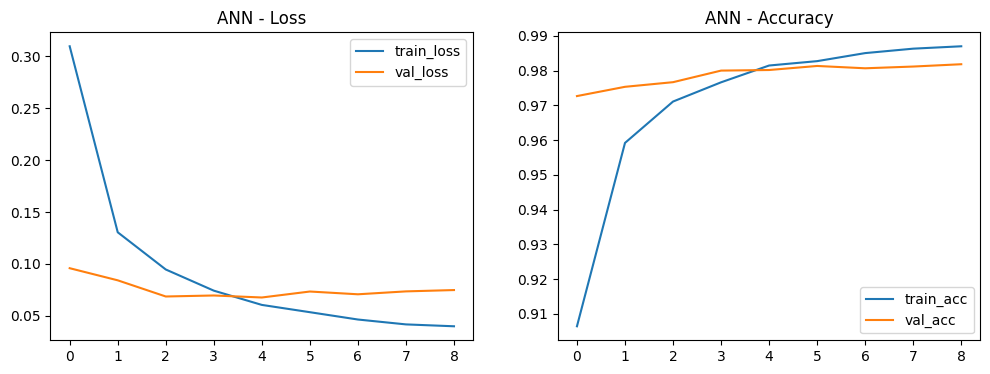

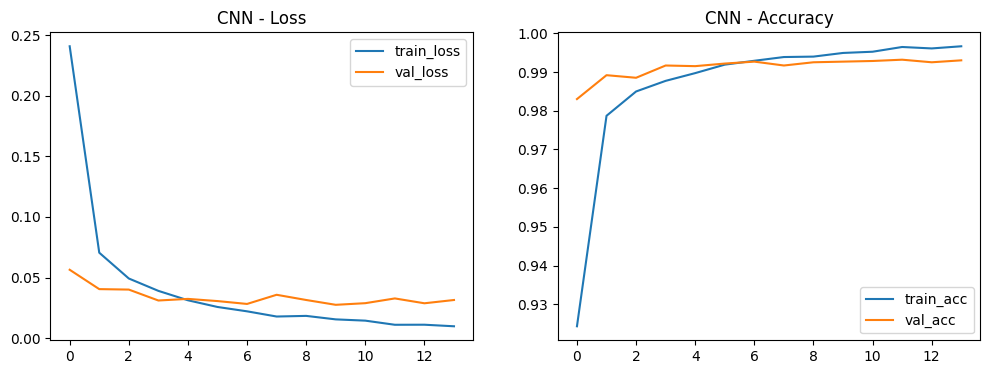

In [9]:
# Evaluate
ann_eval = ann.evaluate(x_test_flat, y_test_cat, verbose=0)
cnn_eval = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)

print(f"ANN test loss: {ann_eval[0]:.4f}, test acc: {ann_eval[1]:.4f}")
print(f"CNN test loss: {cnn_eval[0]:.4f}, test acc: {cnn_eval[1]:.4f}")

# Plot helper
def plot_history(h, title="history"):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train_loss')
    plt.plot(h.history['val_loss'], label='val_loss')
    plt.title(title + " - Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.history.get('accuracy', h.history.get('acc')), label='train_acc')
    plt.plot(h.history.get('val_accuracy', h.history.get('val_acc')), label='val_acc')
    plt.title(title + " - Accuracy")
    plt.legend()
    plt.show()

plot_history(history_ann, "ANN")
plot_history(history_cnn, "CNN")


In [10]:
os.makedirs('models', exist_ok=True)
if os.path.exists('mnist_ann_best.h5'):
    os.rename('mnist_ann_best.h5', os.path.join('models','mnist_ann_best.h5'))
if os.path.exists('mnist_cnn_best.h5'):
    os.rename('mnist_cnn_best.h5', os.path.join('models','mnist_cnn_best.h5'))

print("Saved models to ./models/")


Saved models to ./models/


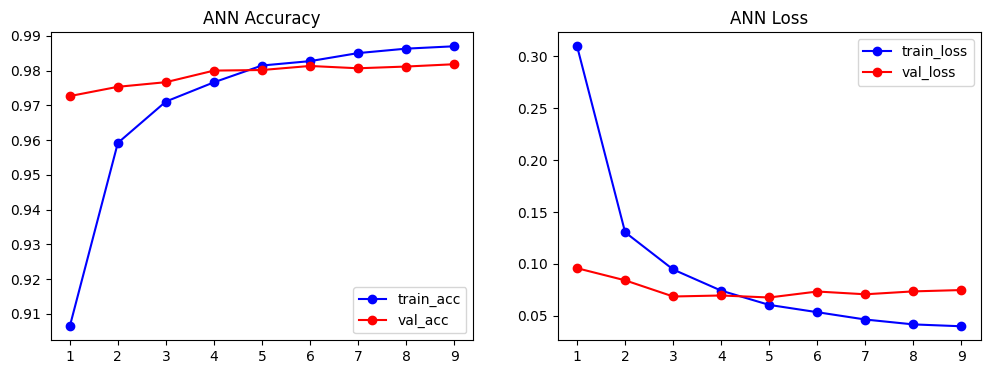

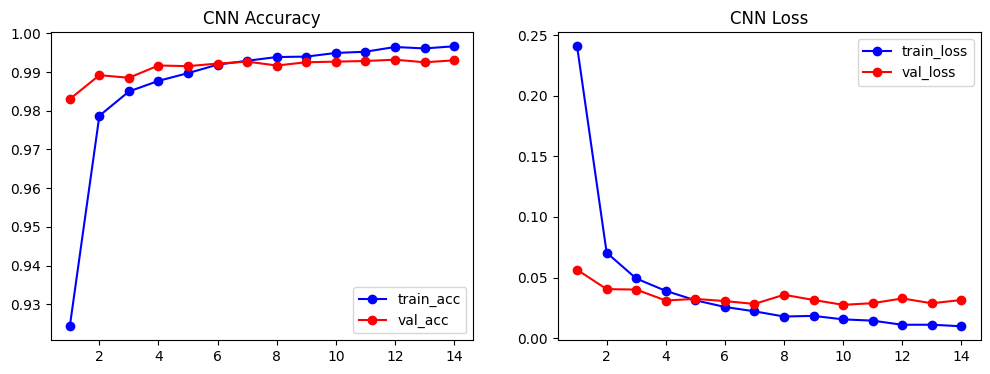

In [11]:
# Plotting helper (robust to variable names)
import matplotlib.pyplot as plt

def plot_history_safe(h, title="Training"):
    if h is None:
        print("No history provided for", title)
        return
    acc = h.history.get('accuracy') or h.history.get('acc')
    val_acc = h.history.get('val_accuracy') or h.history.get('val_acc')
    loss = h.history.get('loss')
    val_loss = h.history.get('val_loss')
    epochs = range(1, len(acc) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'bo-', label='train_acc')
    plt.plot(epochs, val_acc, 'ro-', label='val_acc')
    plt.title(f'{title} Accuracy'); plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'bo-', label='train_loss')
    plt.plot(epochs, val_loss, 'ro-', label='val_loss')
    plt.title(f'{title} Loss'); plt.legend()
    plt.show()

# Use the actual variables from your run:
# If your run used `history_ann` and `history_cnn`:
try:
    plot_history_safe(history_ann, "ANN")
except NameError:
    try:
        plot_history_safe(ann_history, "ANN")
    except NameError:
        print("ANN history not found.")
try:
    plot_history_safe(history_cnn, "CNN")
except NameError:
    try:
        plot_history_safe(cnn_history, "CNN")
    except NameError:
        print("CNN history not found.")


## ANN vs CNN Comparison (MNIST)

| Model | Train Accuracy | Test Accuracy | Notes |
|-------|----------------|---------------|-------|
| ANN   | (see plot)     | (see evaluate) | Flattens input - loses spatial structure |
| CNN   | (see plot)     | (see evaluate) | Learns spatial hierarchies; usually higher accuracy |

**Reflection**  
- The CNN outperforms the ANN on MNIST because it exploits spatial relationships via convolutional filters and pooling. Callbacks (EarlyStopping & ModelCheckpoint) helped avoid overfitting and saved best models.
